# Problem Statement
To find out based on given features whether the loan will get approved or not

In [3]:
##importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
## loading the data
data=pd.read_csv('loan_approved.csv')

In [5]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
data.Loan_Amount_Term.value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Loan_ID                 614 non-null    object 
 1   Gender                  601 non-null    object 
 2   Married                 611 non-null    object 
 3   Dependents              599 non-null    object 
 4   Education               614 non-null    object 
 5   Self_Employed           582 non-null    object 
 6   ApplicantIncome         614 non-null    int64  
 7   CoapplicantIncome       614 non-null    float64
 8   LoanAmount              592 non-null    float64
 9   Loan_Amount_Term        600 non-null    float64
 10  Credit_History          564 non-null    float64
 11  Property_Area           614 non-null    object 
 12  Loan_Status (Approved)  614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


In [9]:
data.shape

(614, 13)

In [10]:
data.describe(include='O')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status (Approved)
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [11]:
#EDA
data.isnull().sum()

Loan_ID                    0
Gender                    13
Married                    3
Dependents                15
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

In [12]:
!pip install SWEETVIZ

In [13]:
import sweetviz as sv #  library for univariant analysis

my_report = sv.analyze(data)## pass the original dataframe

my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

C:\Users\Divya\anaconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Done! Use 'show' commands to display/save.   |█████████████████████████████████████████| [100%]   00:01 -> (00:00 left)


Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [14]:
data1=data[['Gender','Married','Dependents','Education','Self_Employed','Property_Area']]
data2=data[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]

In [15]:
plt.figure(figsize=(20,25), facecolor='white')#To set canvas
plotnumber = 1#counter

for column in data1:#accessing the columns
    plt.subplot(2,3,plotnumber)
    sns.countplot(x=data1[column],hue=data['Loan_Status (Approved)'])
    plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
    plt.ylabel('Loan Status',fontsize=20)
    plotnumber+=1#counter increment
plt.tight_layout()

In [16]:
plt.figure(figsize=(20,25), facecolor='white')#To set canvas
plotnumber = 1#counter

for column in data2:#accessing the columns
    plt.subplot(2,3,plotnumber)
    sns.histplot(x=data2[column],hue=data['Loan_Status (Approved)'])
    plt.xlabel(column,fontsize=20)#assign name to x-axis and set font-20
    plt.ylabel('Loan Status',fontsize=20)
    plotnumber+=1#counter increment
plt.tight_layout()

# Data Preprocessing

In [17]:
data.isnull().sum()

Loan_ID                    0
Gender                    13
Married                    3
Dependents                15
Education                  0
Self_Employed             32
ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                22
Loan_Amount_Term          14
Credit_History            50
Property_Area              0
Loan_Status (Approved)     0
dtype: int64

In [18]:
data.loc[data['Gender'].isnull()==True]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
23,LP001050,NaN,Yes,2,Not Graduate,No,3365,1917.0,112.0,360.0,0.0,Rural,N
126,LP001448,NaN,Yes,3+,Graduate,No,23803,0.0,370.0,360.0,1.0,Rural,Y
171,LP001585,NaN,Yes,3+,Graduate,No,51763,0.0,700.0,300.0,1.0,Urban,Y
188,LP001644,NaN,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y
314,LP002024,NaN,Yes,0,Graduate,No,2473,1843.0,159.0,360.0,1.0,Rural,N
334,LP002103,NaN,Yes,1,Graduate,Yes,9833,1833.0,182.0,180.0,1.0,Urban,Y
460,LP002478,NaN,Yes,0,Graduate,Yes,2083,4083.0,160.0,360.0,NaN,Semiurban,Y
467,LP002501,NaN,Yes,0,Graduate,No,16692,0.0,110.0,360.0,1.0,Semiurban,Y
477,LP002530,NaN,Yes,2,Graduate,No,2873,1872.0,132.0,360.0,0.0,Semiurban,N
507,LP002625,NaN,No,0,Graduate,No,3583,0.0,96.0,360.0,1.0,Urban,N


In [19]:
data.Gender.value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [20]:
data.Gender.isnull().sum()/len(data)*100

2.1172638436482085

In [21]:
import seaborn as sns

sns.countplot(x='Gender',hue='Loan_Status (Approved)',data=data)

<Axes: xlabel='Credit_History', ylabel='Loan Status'>

In [22]:
## Imputing the missing values with mode
data.loc[data['Gender'].isnull()==True,'Gender']='Male'

In [23]:
data.Gender.isnull().sum()

0

In [24]:
data.loc[data['Dependents'].isnull()==True]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status (Approved)
102,LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
104,LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
120,LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
226,LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
228,LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
293,LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
301,LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
332,LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
335,LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,NaN,1.0,Semiurban,Y
346,LP002130,Male,Yes,NaN,Not Graduate,No,3523,3230.0,152.0,360.0,0.0,Rural,N


In [25]:
data.Dependents.value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [26]:
sns.countplot(x='Dependents',data=data,hue='Loan_Status (Approved)')

<Axes: xlabel='Credit_History', ylabel='Loan Status'>

In [27]:
# From the graphical representation it can be seen that as the number of dependents
#getting increased,
# the chances of approval is less, since we have missed values and if we approve
# loan for them
# it can turn into major loss(high chance).Hence we will substitue missing values
#by 3+.
data.loc[data['Dependents'].isnull()==True,'Dependents']= '3+'

In [28]:
data.rename(columns={"Loan_Status (Approved)":'Loan_Status'},inplace=True)

In [29]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [30]:
data.Married.value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [31]:
data.loc[data['Married'].isnull()==True,'Married']='Yes'

In [32]:
data.Self_Employed.value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [33]:
data.loc[data['Self_Employed'].isnull()==True,"Self_Employed"]='No'

In [34]:
data.Credit_History.value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [35]:
data.loc[data['Credit_History'].isnull()==True,"Credit_History"]=1.0

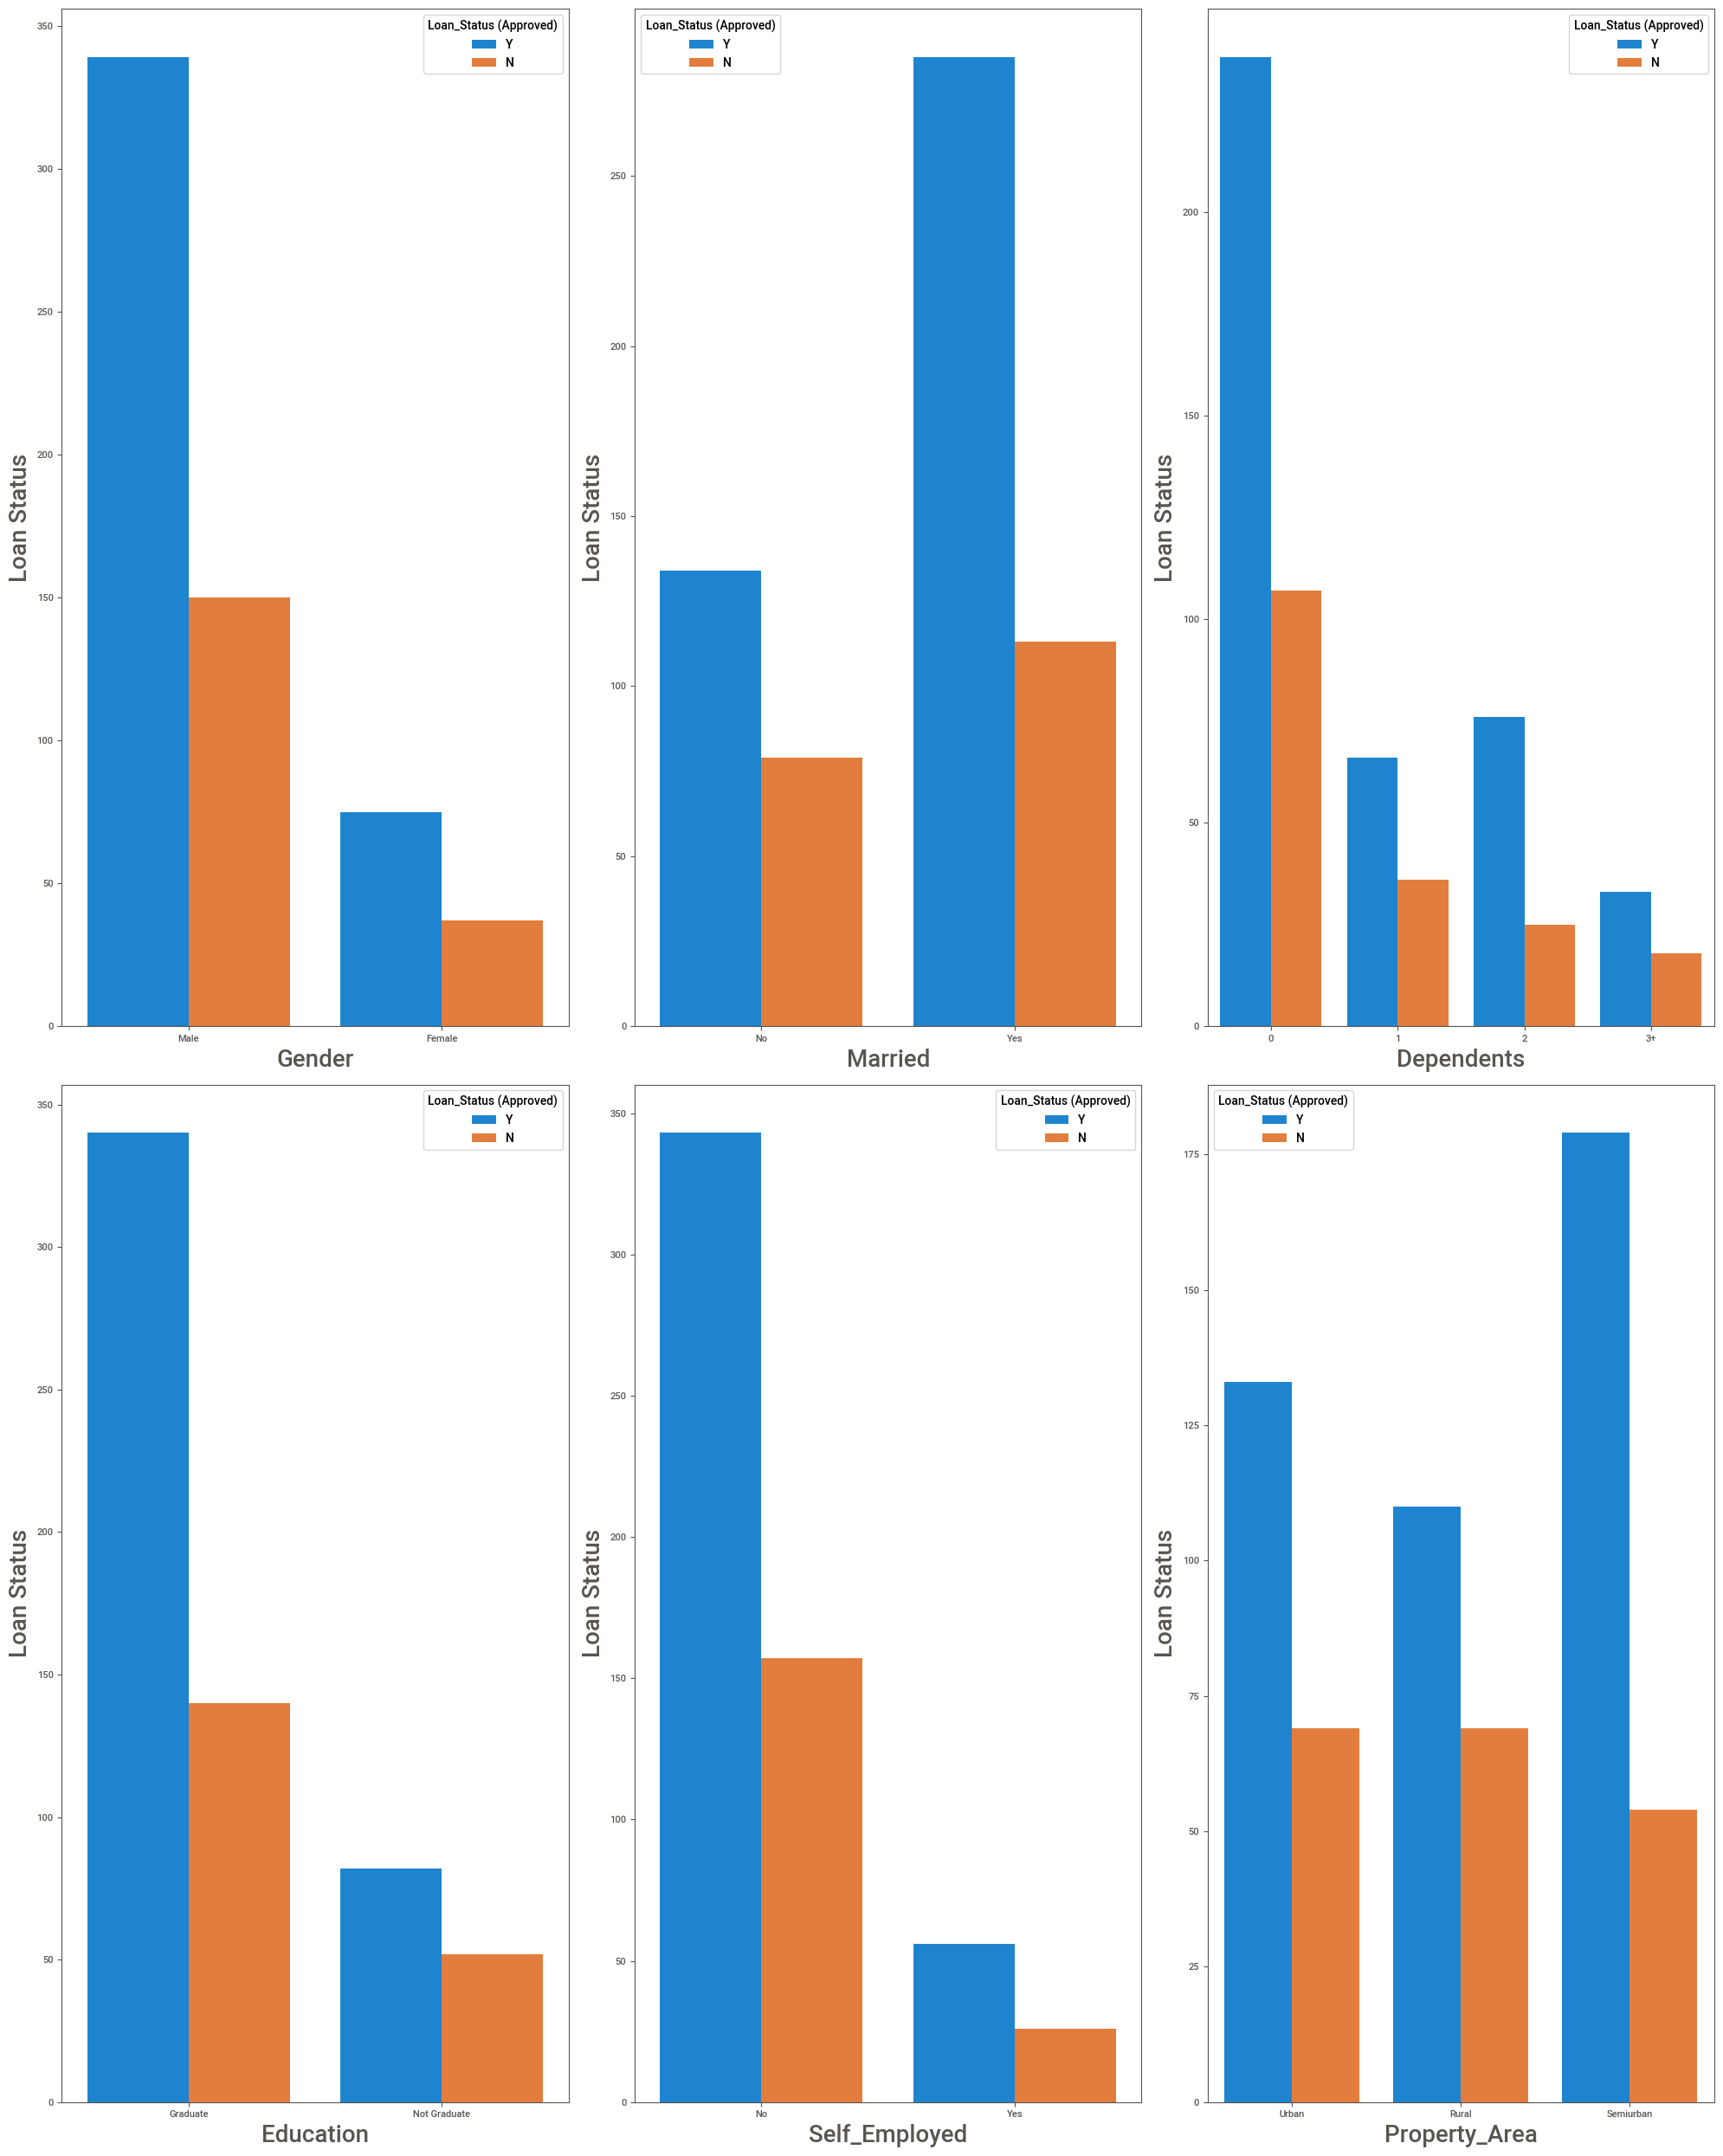

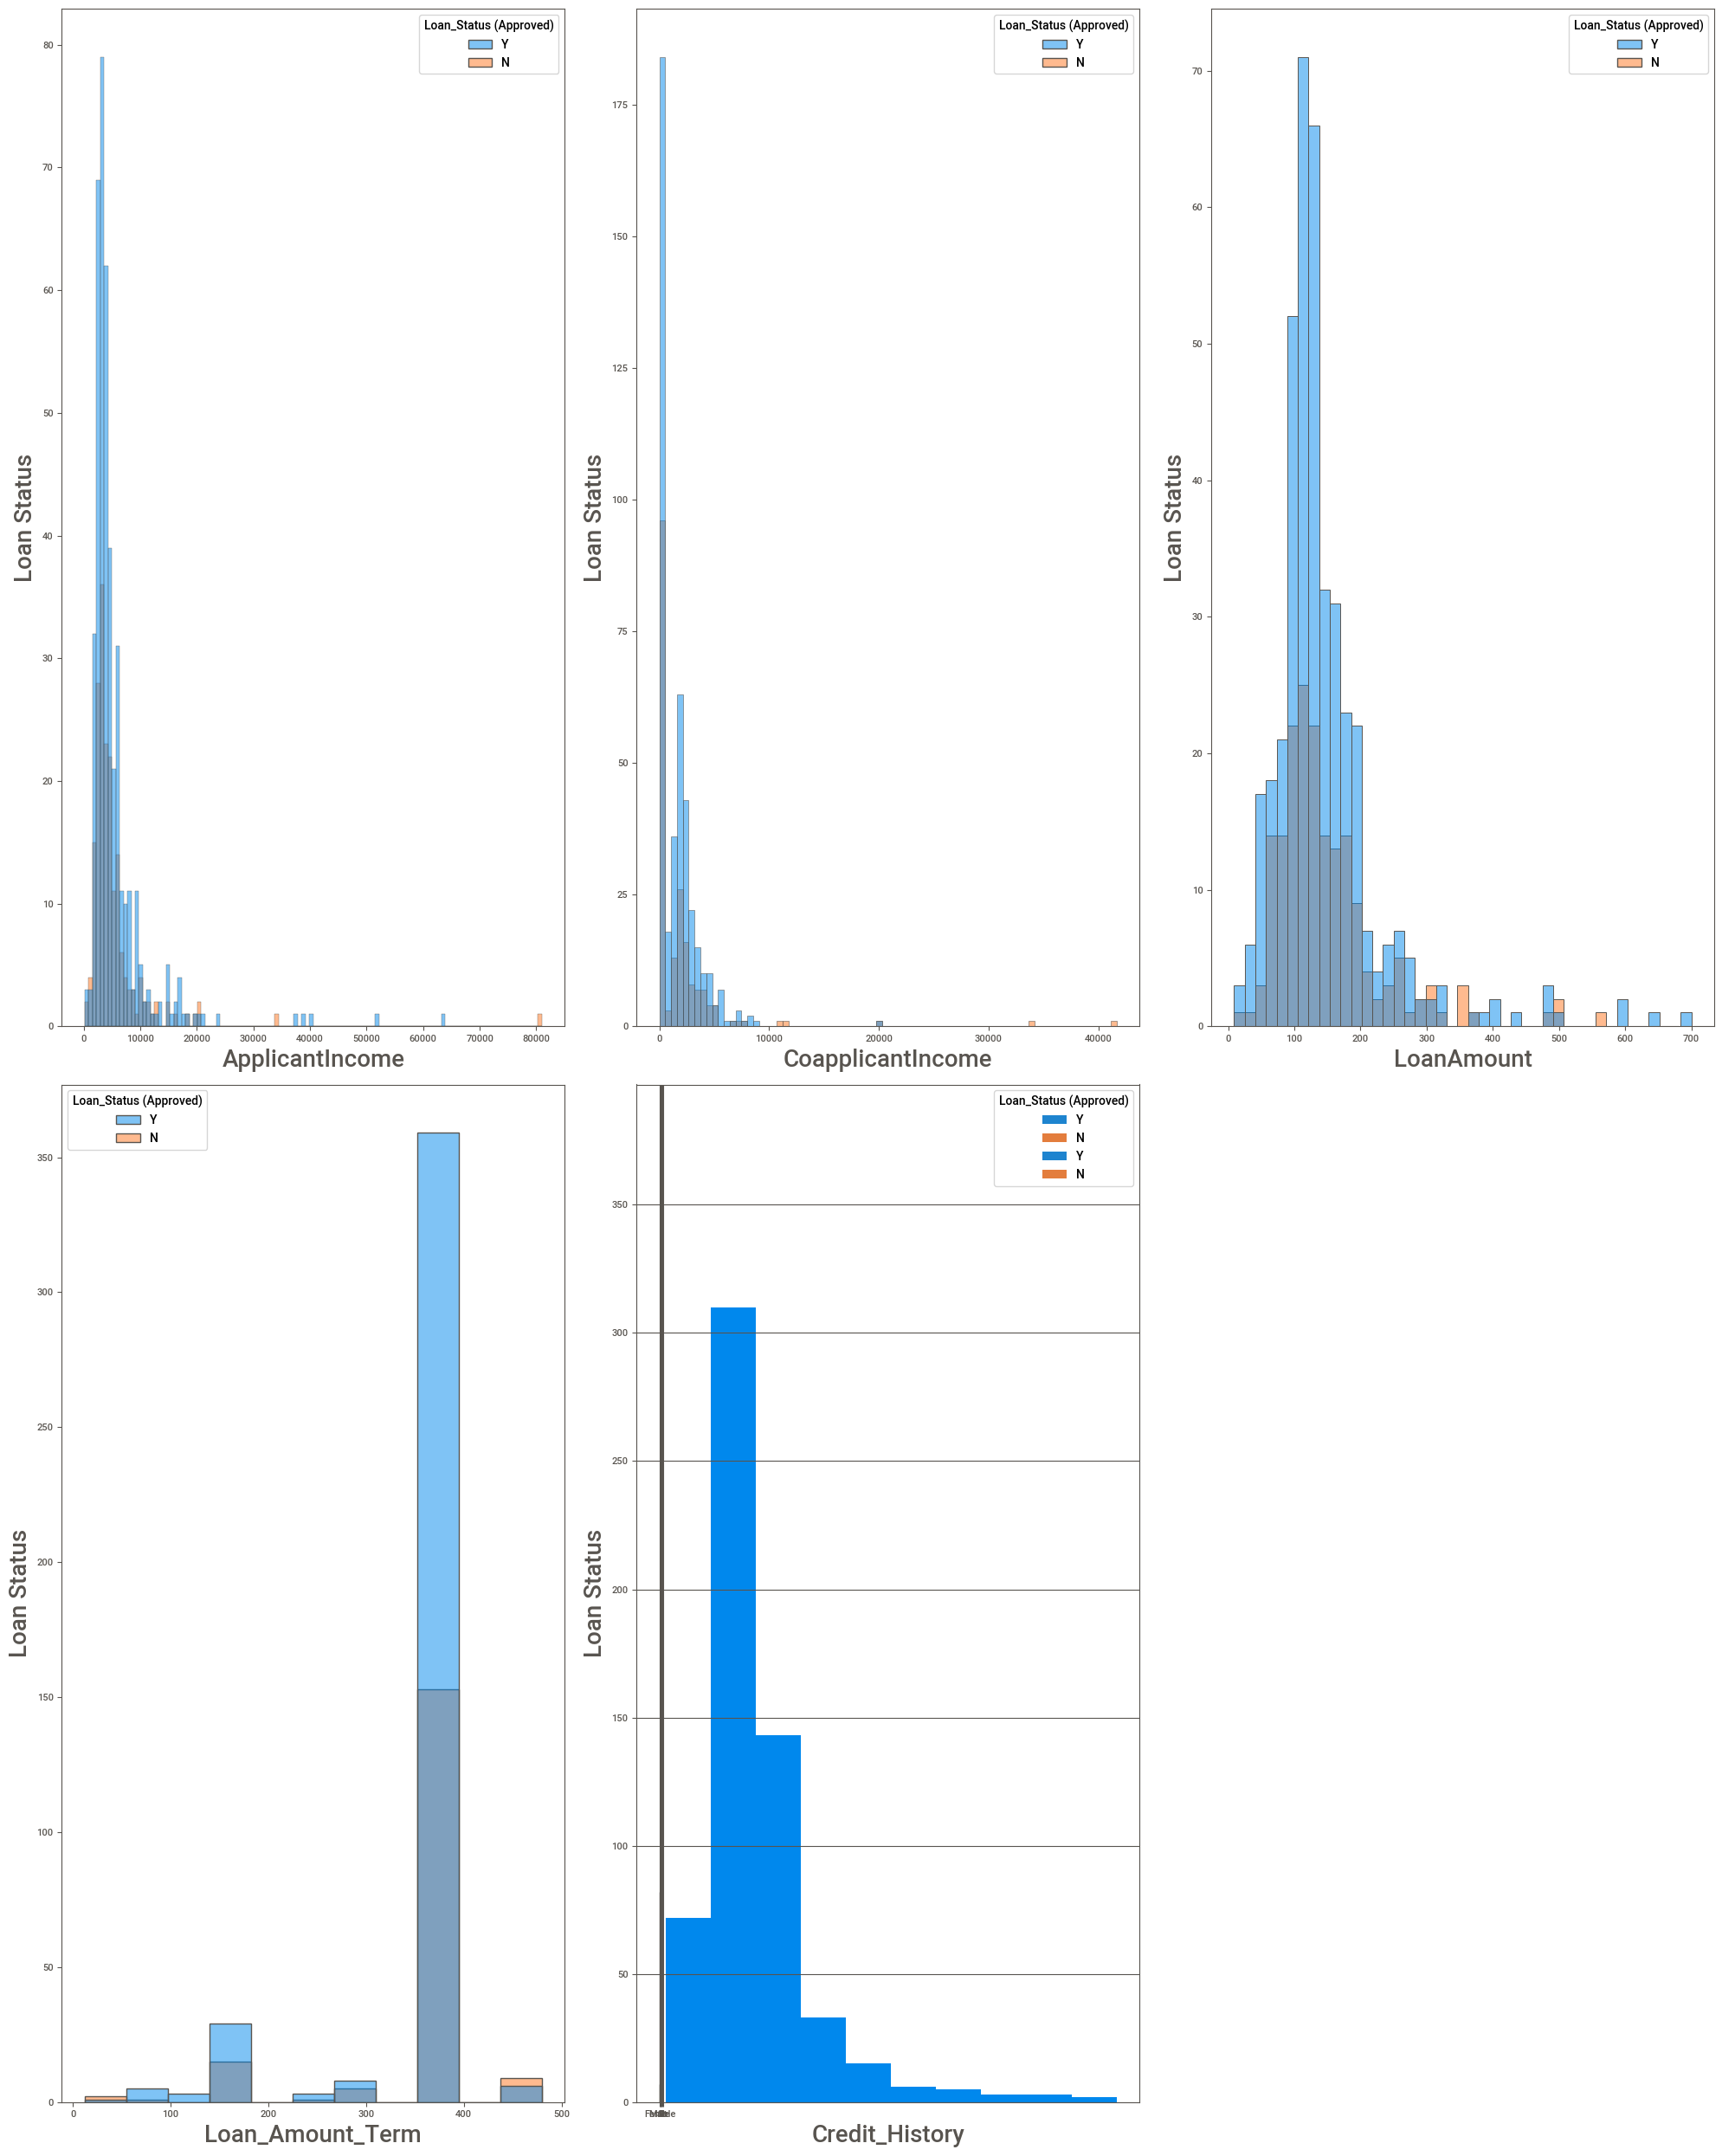

In [36]:
data.LoanAmount.hist()
plt.show()

In [37]:
np.median(data.LoanAmount.dropna(axis=0))

128.0

In [38]:
data.loc[data['LoanAmount'].isnull()==True,'LoanAmount']=np.median(data.LoanAmount.dropna(axis=0))

In [41]:
data.Loan_Amount_Term.value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [42]:
data.Loan_Amount_Term.hist()

<Axes: >

In [43]:
data.loc[data['Loan_Amount_Term'].isnull()==True,'Loan_Amount_Term']=np.median(data.Loan_Amount_Term.dropna(axis=0))

In [44]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    int32  
 3   Dependents         614 non-null    int32  
 4   Education          614 non-null    int32  
 5   Self_Employed      614 non-null    int32  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int32  
 12  Loan_Status        614 non-null    int32  
dtypes: float64(4), int32(6), int64(1), object(2)
memory usage: 48.1+ KB


In [40]:
## Using label encoder to convert the categorical data to numerical data
## Donot run this code.This is just implementation of label encoder.This dataset have lots relationship with target.
#ordinal data
from sklearn.preprocessing import LabelEncoder
lc=LabelEncoder()

data.Married=lc.fit_transform(data.Married)
data.Education=lc.fit_transform(data.Education)
data.Property_Area=lc.fit_transform(data.Property_Area)
data.Loan_Status=lc.fit_transform(data.Loan_Status)
data.Dependents=lc.fit_transform(data.Dependents)
data.Self_Employed=lc.fit_transform(data.Self_Employed)

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [46]:
data.Education.unique()

array([0, 1])

In [47]:
data.Married

0      0
1      1
2      1
3      1
4      0
      ..
609    0
610    1
611    1
612    1
613    0
Name: Married, Length: 614, dtype: int32

In [48]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,Male,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,Male,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,Male,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,Male,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


In [49]:
data.Gender=pd.get_dummies(data.Gender,drop_first=True,dtype=int)

In [50]:
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [51]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [52]:
##Scaling
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']]=scale.fit_transform(data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']])

In [53]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,0.070489,0.000000,0.172214,0.74359,1.0,2,1
1,LP001003,1,1,1,0,0,0.054830,0.036192,0.172214,0.74359,1.0,0,0
2,LP001005,1,1,0,0,1,0.035250,0.000000,0.082489,0.74359,1.0,2,1
3,LP001006,1,1,0,1,0,0.030093,0.056592,0.160637,0.74359,1.0,2,1
4,LP001008,1,0,0,0,0,0.072356,0.000000,0.191027,0.74359,1.0,2,1


In [54]:
##Feature Selection
corr_data=data[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']]

In [55]:
sns.heatmap(corr_data.corr(),annot=True)

<Axes: >

In [56]:
corr_data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term
count,614.000000,614.000000,614.000000,614.000000
mean,0.064978,0.038910,0.197905,0.706005
std,0.075560,0.070229,0.121718,0.137668
min,0.000000,0.000000,0.000000,0.000000
25%,0.033735,0.000000,0.132055,0.743590
50%,0.045300,0.028524,0.172214,0.743590
75%,0.069821,0.055134,0.225398,0.743590
max,1.000000,1.000000,1.000000,1.000000


In [57]:
data.duplicated().sum()

0

# Model creation

In [58]:
x=data.iloc[:,1:-1]
y=data.Loan_Status

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=3)

In [60]:
y.value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [61]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [63]:
x_smote, y_smote = smote.fit_resample(x_train,y_train)

In [64]:
from collections import Counter
print("Actual Classes",Counter(y_train))
print("SMOTE Classes",Counter(y_smote))

Actual Classes Counter({1: 282, 0: 147})
SMOTE Classes Counter({0: 282, 1: 282})


In [66]:
# Support Vector Classifier Model

from sklearn.svm import SVC
svclassifier = SVC() ## base model with default parameters
svclassifier.fit(x_smote, y_smote)

SVC()

In [68]:
# Predict output for X_test

y_hat=svclassifier.predict(x_test)

In [69]:
## evaluating the model created
from sklearn.metrics import accuracy_score,recall_score,precision_score,classification_report,f1_score
acc=accuracy_score(y_test,y_hat)
acc

0.7513513513513513

In [70]:
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           0       0.49      0.62      0.55        45
           1       0.87      0.79      0.83       140

    accuracy                           0.75       185
   macro avg       0.68      0.71      0.69       185
weighted avg       0.78      0.75      0.76       185



In [71]:
cm1=pd.crosstab(y_test,y_hat)
cm1

col_0,0,1
Loan_Status,,
0,28,17
1,29,111


In [72]:
f1=f1_score(y_test,y_hat)
f1

0.8283582089552239

In [74]:
## checking cross validation score
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svclassifier,x,y,cv=3,scoring='f1')
print(scores)
print("Cross validation Score:",scores.mean())
print("Std :",scores.std())
#std of < 0.05 is good.

[0.87066246 0.86875    0.89032258]
Cross validation Score: 0.8765783470709948
Std : 0.009749951923361921


# GridSearchCV

In [75]:
from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 5, 10,50,60,70],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
             'random_state':(list(range(1, 20)))}
model=SVC()
grid = GridSearchCV(model, param_grid, refit = True, verbose = 2,scoring='f1',cv=5)

# fitting the model for grid search
grid.fit(x,y)

Fitting 5 folds for each of 570 candidates, totalling 2850 fits
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=1; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=2; total time=   0.0s
[CV] END .....................C=0.1, gamma=1, random_state=3; total time=   0.0s
[CV] END .....................C=0.1, gamma=1,

[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ...................C=0.1, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ...................

[CV] END ..................C=0.1, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ..................C=0.1, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ..................C

[CV] END .................C=0.1, gamma=0.001, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=8; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END .................C=0.1, gamma=0.001, random_state=9; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=10; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=10; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=10; total time=   0.0s
[CV] END ................C=0.1, gamma=0.001, random_state=10; total time=   0.0s
[CV] END ................C=0

[CV] END ...............C=0.1, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=11; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=12; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ...............C=0.1, gamma=0.0001, random_state=13; total time=   0.0s
[CV] END ...............C=0.

[CV] END ......................C=5, gamma=1, random_state=13; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=13; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=13; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=13; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=14; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=14; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=14; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=14; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=14; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=15; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=15; total time=   0.0s
[CV] END ......................C=5, gamma=1, random_state=15; total time=   0.0s
[CV] END ...................

[CV] END ....................C=5, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=15; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ....................C=5, gamma=0.1, random_state=16; total time=   0.0s
[CV] END ...................

[CV] END ...................C=5, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=17; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ...................C=5, gamma=0.01, random_state=18; total time=   0.0s
[CV] END ...................

[CV] END ..................C=5, gamma=0.001, random_state=19; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=19; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=19; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=19; total time=   0.0s
[CV] END ..................C=5, gamma=0.001, random_state=19; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=1; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END ..................C=5, gamma=0.0001, random_state=2; total time=   0.0s
[CV] END ..................C

[CV] END ......................C=10, gamma=1, random_state=1; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=2; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=3; total time=   0.0s
[CV] END ......................C=10, gamma=1, random_state=4; total time=   0.0s
[CV] END ...................

[CV] END ....................C=10, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=3; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=4; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ....................C=10, gamma=0.1, random_state=5; total time=   0.0s
[CV] END ...................

[CV] END ...................C=10, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=5; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=6; total time=   0.0s
[CV] END ...................C=10, gamma=0.01, random_state=7; total time=   0.0s
[CV] END ...................

[CV] END ..................C=10, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=7; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C=10, gamma=0.001, random_state=8; total time=   0.0s
[CV] END ..................C

[CV] END .................C=10, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=8; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END .................C=10, gamma=0.0001, random_state=9; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=10, gamma=0.0001, random_state=10; total time=   0.0s
[CV] END ................C=1

[CV] END .....................C=50, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=10; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=11; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=12; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=12; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=12; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=12; total time=   0.0s
[CV] END .....................C=50, gamma=1, random_state=12; total time=   0.0s
[CV] END ...................

[CV] END ...................C=50, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=13; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................C=50, gamma=0.1, random_state=14; total time=   0.0s
[CV] END ...................

[CV] END ..................C=50, gamma=0.01, random_state=13; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=14; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=14; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=14; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=14; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=14; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=15; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=15; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=15; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=15; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=15; total time=   0.0s
[CV] END ..................C=50, gamma=0.01, random_state=16; total time=   0.0s
[CV] END ..................C

[CV] END .................C=50, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=16; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=50, gamma=0.001, random_state=17; total time=   0.0s
[CV] END .................C=

[CV] END ................C=50, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=18; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ................C=50, gamma=0.0001, random_state=19; total time=   0.0s
[CV] END ......................C=60, gamma=1, random_state=1; total time=   0.0s
[CV] END ...................

[CV] END .....................C=60, gamma=1, random_state=19; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=19; total time=   0.0s
[CV] END .....................C=60, gamma=1, random_state=19; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=1; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ....................C=60, gamma=0.1, random_state=2; total time=   0.0s
[CV] END ...................

[CV] END ...................C=60, gamma=0.01, random_state=2; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=2; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=2; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=2; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=3; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................C=60, gamma=0.01, random_state=4; total time=   0.0s
[CV] END ...................

[CV] END ..................C=60, gamma=0.001, random_state=3; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=4; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=5; total time=   0.0s
[CV] END ..................C=60, gamma=0.001, random_state=6; total time=   0.0s
[CV] END ..................C

[CV] END .................C=60, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=5; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=6; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=60, gamma=0.0001, random_state=7; total time=   0.0s
[CV] END .................C=

[CV] END ......................C=70, gamma=1, random_state=7; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=8; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=8; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=8; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=8; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=8; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=9; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=9; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=9; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=9; total time=   0.0s
[CV] END ......................C=70, gamma=1, random_state=9; total time=   0.0s
[CV] END .....................C=70, gamma=1, random_state=10; total time=   0.0s
[CV] END ...................

[CV] END ...................C=70, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=10; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=11; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................C=70, gamma=0.1, random_state=12; total time=   0.0s
[CV] END ...................

[CV] END ..................C=70, gamma=0.01, random_state=11; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=11; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=12; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=12; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=12; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=12; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=12; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=13; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=13; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=13; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=13; total time=   0.0s
[CV] END ..................C=70, gamma=0.01, random_state=13; total time=   0.0s
[CV] END ..................C

[CV] END .................C=70, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=13; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=14; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=70, gamma=0.001, random_state=15; total time=   0.0s
[CV] END .................C=

[CV] END ................C=70, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=15; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=16; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=70, gamma=0.0001, random_state=17; total time=   0.0s
[CV] END ................C=7

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 5, 10, 50, 60, 70],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'random_state': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19]},
             scoring='f1', verbose=2)

In [76]:
print(grid.best_params_)


{'C': 5, 'gamma': 0.1, 'random_state': 1}


In [77]:
print(grid.best_estimator_)

SVC(C=5, gamma=0.1, random_state=1)


In [78]:
clf=SVC(C=5, gamma=0.1,random_state=1)

In [79]:
clf.fit(x_smote, y_smote)

SVC(C=5, gamma=0.1, random_state=1)

In [80]:
y_clf=clf.predict(x_test)

In [81]:
print(classification_report(y_test,y_clf))

              precision    recall  f1-score   support

           0       0.49      0.62      0.55        45
           1       0.87      0.79      0.83       140

    accuracy                           0.75       185
   macro avg       0.68      0.71      0.69       185
weighted avg       0.78      0.75      0.76       185



In [82]:
cm=pd.crosstab(y_test,y_clf)
cm

col_0,0,1
Loan_Status,,
0,28,17
1,29,111


In [83]:
f1=f1_score(y_test,y_clf)
f1

0.8283582089552239

In [85]:
scores_after = cross_val_score(clf,x,y,cv=3,scoring='f1')
print(scores_after)
print("Cross validation Score:",scores_after.mean())
print("Std :",scores.std())
#std of < 0.05 is good.

[0.87066246 0.86875    0.89032258]
Cross validation Score: 0.8765783470709948
Std : 0.009749951923361921
